In [16]:
import numpy as np
import matplotlib.pyplot as plt
import random
from math import sqrt

def onsager(z, r, tau):
    return (z/n) * np.sum(eta(r, tau) != 0)

def eta(u, T):
    return (u - T)*(u >= T) + (u + T)*(u <= -T)

In [35]:
# Define simulation parameters
n = 270
N = 1024
k = 40
sigma = 0.05
s = 0.2
lambda_ = 0.1
num_iterations = 5

In [31]:
# SD * random array of size nxN
A = np.sqrt(1/n)*np.random.randn(n, N)

# Track MSE vs iterations
#array of zeros the size of the iterations
mse_vs_iterations = np.zeros(num_iterations)
mse_vs_iterationsA = np.zeros(num_iterations)
mse_vs_iterationsB = np.zeros(num_iterations)

# Generate sparse vector x
x = np.zeros((N, 1))
idx_nonzero_entries = np.random.permutation(N)[0:k]
non_zero_entries = np.random.randint(10, size=(k, 1))+1
x[idx_nonzero_entries] = 1

# Generate noise vector w
# converts it to a column vector. nX1
w = sigma*np.random.randn(n).reshape(-1, 1)
w1 = sigma*np.random.randn(n).reshape(-1,1)

# Generate measurement vector y - note that a @ b is equal to np.matmul(a, b)
y = A @ x + w 
yb = A @ x + w1

# Prep for IST/AMP
z = np.zeros(y.shape)
xHt = np.zeros(x.shape)

In [32]:
z = np.zeros(y.shape)
xHt = np.zeros(x.shape)
r = 0
tau = 0
ons = 0

#AMP
for idx_iter in range(num_iterations):
    ons = onsager(z, r, tau)
    z = y - A @ xHt + ons
    tau = np.sqrt(1/n) * np.linalg.norm(z)
    r = xHt + A.T @ z
    xHt = eta(r, tau)

    # find the current error
    mse_vs_iterations[idx_iter] = (1/N) * np.sum((x - xHt)**2)

In [33]:
# reset the estimate and error
za = np.zeros(y.shape)
zb = np.zeros(y.shape)
xHt = np.zeros(x.shape)
ra = 0
rb = 0
taua = 0
taub = 0
onsa = 0
onsb = 0

# MSE vs iterations
mse_vs_iter1 = np.zeros(num_iterations)
for idx_iter in range(num_iterations):
    onsa = onsager(za, ra, taua)
    za = y - A @ xHt + onsa
    taua = np.sqrt(1/n) * np.linalg.norm(za)
    ra = xHt + A.T @ za
    xHt = eta(ra, taua)
# find the current error
    err_sum1 = np.sum((x - xHt)**2)
    
# do the same for second vector
    onsb = onsager(zb, rb, taub)
    zb = y - A @ xHt + onsb
    taub = np.sqrt(1/n) * np.linalg.norm(zb)
    rb = xHt + A.T @ zb
    xHt = eta(rb, taub)
# find the current error
    err_sum2 = np.sum((x - xHt)**2)
    
    # average the error together
    mse_vs_iter1[idx_iter] = (1/(2*N)) * (err_sum1 +  err_sum2)

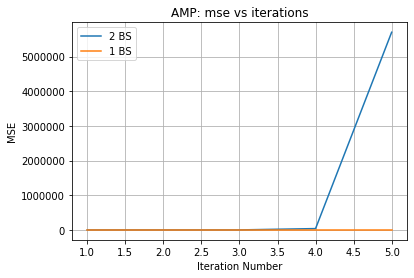

In [34]:
# Plot results
plt.figure()
plt.plot(range(1,num_iterations+1), mse_vs_iter1, label="2 BS")
plt.plot(range(1,num_iterations+1), mse_vs_iterations, label="1 BS")
plt.legend()
plt.xlabel('Iteration Number')
plt.ylabel('MSE')
plt.grid(True, which='both')
plt.title("AMP: mse vs iterations")
plt.show()